<a href="https://colab.research.google.com/github/alirezaghl/Steinmetz-Dataset/blob/main/Steinmetz_Data_Workplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import os

files = [['steinmetz_st.npz', 'https://osf.io/4bjns/download'],
         ['steinmetz_part1.npz', 'https://osf.io/agvxh/download'],
         ['steinmetz_part2.npz', 'https://osf.io/uv3mw/download'],
         ['steinmetz_part3.npz', 'https://osf.io/ehmw2/download']]

for file in files:
  if file[0] not in os.listdir():
    !wget -qO {file[0]} {file[1]}

In [3]:
import numpy as np


alldat = np.array([])
for file in files[1:]:
  alldat = np.hstack((alldat, np.load(file[0], allow_pickle=True)['dat']))


dat_ST = np.load(files[0][0], allow_pickle=True)['dat']

In [4]:
# Function to get specific brain region indices
def Neuron_Index(region, data):
  sessions = {}

  for i in range(alldat.shape[0]):
    session = data[i]
    if region in session['brain_area']:
      neuron_index = [index for index, label in enumerate(session['brain_area']) if label == region]
      sessions[i] = neuron_index
  return sessions

In [6]:
data = []

for i in range(alldat.shape[0]):
  session = alldat[i]['spks']
  row = [i]
  row.extend(session.shape)
  spikeCount = np.sum(np.sum(session))
  row.append(spikeCount)
  data.append(row)

In [7]:
data_df = pd.DataFrame(data, columns=["Session", "Neurons", "Trials", "Time bins", "Number of spikes"])
data_df.set_index('Session', inplace=True)

In [8]:
data_df

,Neurons,Trials,Time bins,Number of spikes
Session,,,,
0,734,214,250,1384069
1,1070,251,250,2015351
2,619,228,250,2272088
3,1769,249,250,2291879
4,1077,254,250,1965477
5,1169,290,250,1400163
6,584,252,250,1328911
7,1156,250,250,2807358
8,788,372,250,2840446


In [9]:
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"],  # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"],  # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP","TT"],  # non-visual cortex
                ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"],  # midbrain
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"],  # basal ganglia
                ["BLA", "BMA", "EP", "EPd", "MEA"]  # cortical subplate
                ]

In [10]:
dat = alldat[38]

In [11]:
dat_sp = dat_ST[38]

In [12]:
dat_sp.keys()

dict_keys(['ss', 'ss_passive'])

In [13]:
dat['spks'].shape # Neurons * trials * time

(1348, 343, 250)

In [14]:
Bin_Size = dat['bin_size']
Firing_Rate= dat['spks'].mean(axis = (1,2))* 1/Bin_Size

In [15]:
session_df = pd.DataFrame({
    "Mean Firing Rate": Firing_Rate,
    "Region": dat['brain_area'],
    "Area":dat['brain_area'],
    'Mouse_Name': dat['mouse_name']
})
session_df.replace(
    {
        "Area": {"CA1":"Hippocampus","DG":"Hippocampus","SUB":"Hippocampus",
        "VISp": "Visual Ctx", "VISam":"Visual Ctx","MD":"Thalamus","LGd":"Thalamus", "LH":"Thalamus",
        "PL":"Other Ctx","MOs":"Other Ctx","ACA":"Other Ctx", "VISa":"Visual Ctx", "VISl":"Visual Ctx", "VISpm":"Visual Ctx", "VISrl":"Visual Ctx"
        }
    }, inplace = True
)

In [16]:
session_df.head(30)

,Mean Firing Rate,Region,Area,Mouse_Name
0,1.568513,SUB,Hippocampus,Theiler
1,0.167930,SUB,Hippocampus,Theiler
2,0.601749,SUB,Hippocampus,Theiler
3,2.906122,SUB,Hippocampus,Theiler
4,0.697376,SUB,Hippocampus,Theiler
5,0.707872,SUB,Hippocampus,Theiler
6,0.422157,SUB,Hippocampus,Theiler
7,2.985423,VISp,Visual Ctx,Theiler
8,0.257726,VISp,Visual Ctx,Theiler
9,2.857143,SUB,Hippocampus,Theiler


In [17]:
session_df['Region'].unique()

array(['SUB', 'VISp', 'root', 'DG', 'VISam', 'LP', 'CA1', 'ILA', 'PL',
       'ACA', 'MOs'], dtype=object)

In [18]:
dat['spks'].shape[0]

1348

In [19]:
# giving every region an index
number_of_neurons = dat['spks'].shape[0] # number of neurons
barea = len(brain_groups) * np.ones(number_of_neurons, )
for j in range(len(brain_groups)):
    barea[np.isin(dat['brain_area'], brain_groups[j])] = j

In [20]:
data = {}
data['all'] = dat['spks']
counter = 0
for region in regions:
    data[region] = dat['spks'][barea == counter]
    counter += 1

for key in data:
    print(f"There are {len(data[key])} neurons recorded in {key}  region\n")

There are 1348 neurons recorded in all  region

There are 141 neurons recorded in vis ctx  region

There are 59 neurons recorded in thal  region

There are 209 neurons recorded in hipp  region

There are 497 neurons recorded in other ctx  region

There are 0 neurons recorded in midbrain  region

There are 0 neurons recorded in basal ganglia  region

There are 0 neurons recorded in cortical subplate  region

There are 442 neurons recorded in other  region



<ipython-input-21-aca90da2a79c>:3: RuntimeWarning: Mean of empty slice.
  ax.plot(dat['spks'][barea == j].mean(axis = (0, 1)), label = regions[j])# average over neurons in region and trials
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


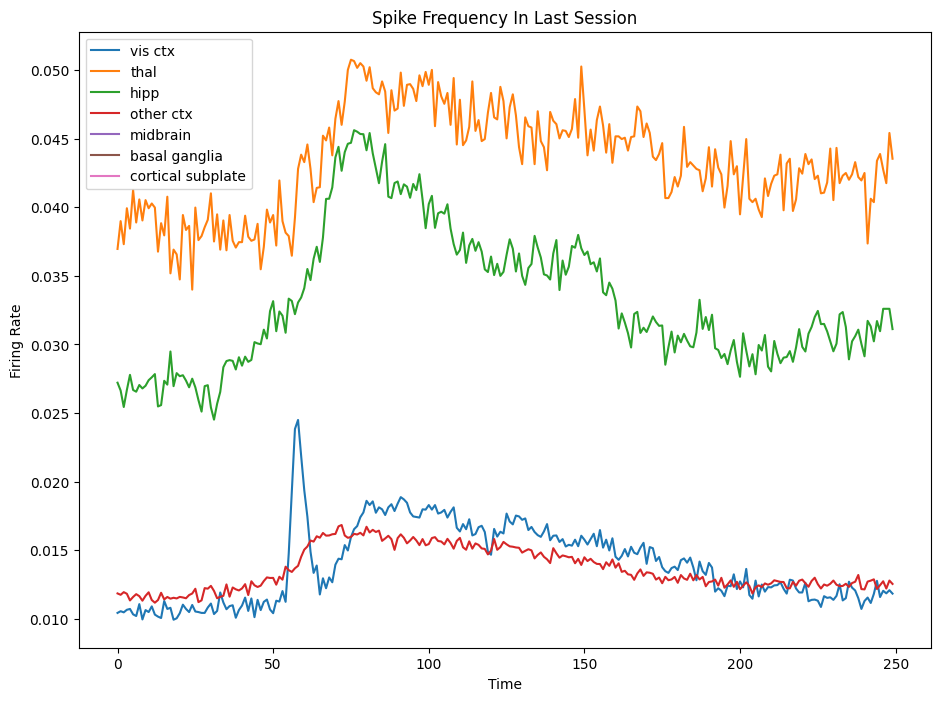

In [21]:
_, ax = plt.subplots(figsize = (11,8))
for j in range(len(brain_groups)) :
    ax.plot(dat['spks'][barea == j].mean(axis = (0, 1)), label = regions[j])# average over neurons in region and trials
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Firing Rate')
ax.set_title('Spike Frequency In Last Session')
plt.show()

Text(0.5, 1.0, 'Spike Frequency In Last Session')

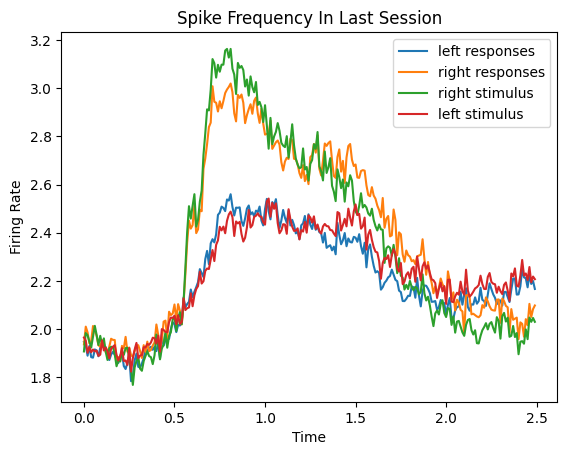

In [22]:
bin_time = dat['bin_size']
time_points = dat['spks'].shape[-1]
response = dat['response']
right_vis_stim = dat['contrast_right']
left_vis_stim = dat['contrast_left']

plt.plot(bin_time * np.arange(time_points), 1 / bin_time * dat['spks'][:,response >= 0].mean(axis=(0,1))) # left responses
plt.plot(bin_time * np.arange(time_points), 1 / bin_time * dat['spks'][:,response < 0].mean(axis=(0,1))) # right responses
plt.plot(bin_time * np.arange(time_points), 1 / bin_time * dat['spks'][:,right_vis_stim > 0].mean(axis=(0,1))) # right stimuli
plt.plot(bin_time * np.arange(time_points), 1 / bin_time * dat['spks'][:,right_vis_stim == 0].mean(axis=(0,1))) # left stimuli
plt.xlabel("Time")
plt.ylabel("Firing Rate")
plt.legend(['left responses', 'right responses', 'right stimulus', 'left stimulus'])
plt.title('Spike Frequency In Last Session')

Text(0.5, 1.0, 'Visual Cortex Neurons Responses to Visual Stimuli Over Trials')

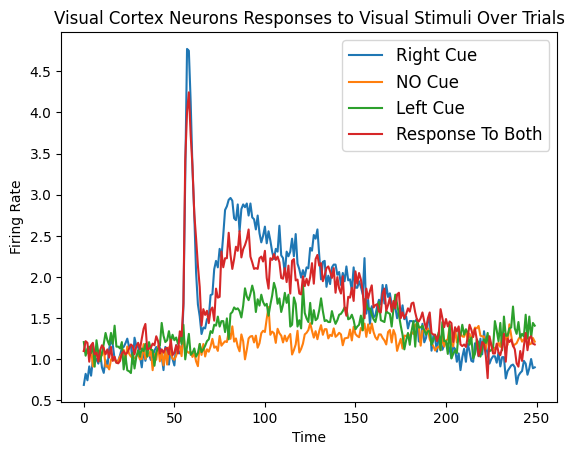

In [44]:
spikes = dat['spks']
bin_time = dat['bin_size']
right_visual_stimuli = dat['contrast_right']
left_visual_stimuli = dat['contrast_left']
fig, axs = plt.subplots(sharey = True)
plt.plot(1 / bin_time * spikes[session_df['Area']=='Visual Ctx'][:,np.logical_and(left_visual_stimuli == 0,right_visual_stimuli > 0)].mean(axis=(0,1)))
plt.plot(1 / bin_time * spikes[session_df['Area']=='Visual Ctx'][:,np.logical_and(left_visual_stimuli == 0, right_visual_stimuli == 0)].mean(axis=(0,1)))
plt.plot(1 / bin_time * spikes[session_df['Area']=='Visual Ctx'][:,np.logical_and(left_visual_stimuli > 0, right_visual_stimuli == 0)].mean(axis=(0,1)))
plt.plot(1 / bin_time * spikes[session_df['Area']=='Visual Ctx'][:,np.logical_and(left_visual_stimuli> 0, right_visual_stimuli > 0)].mean(axis=(0,1)))
plt.xlabel('Time')
plt.ylabel('Firing Rate')
plt.legend(['Right Cue', 'NO Cue', 'Left Cue', 'Response To Both'], fontsize=12)
plt.title('Visual Cortex Neurons Responses to Visual Stimuli Over Trials')

In [24]:
dat['spks'][dat['brain_area']=='CA1'].shape

(47, 343, 250)

Text(0, 0.5, 'Nueorn Index')

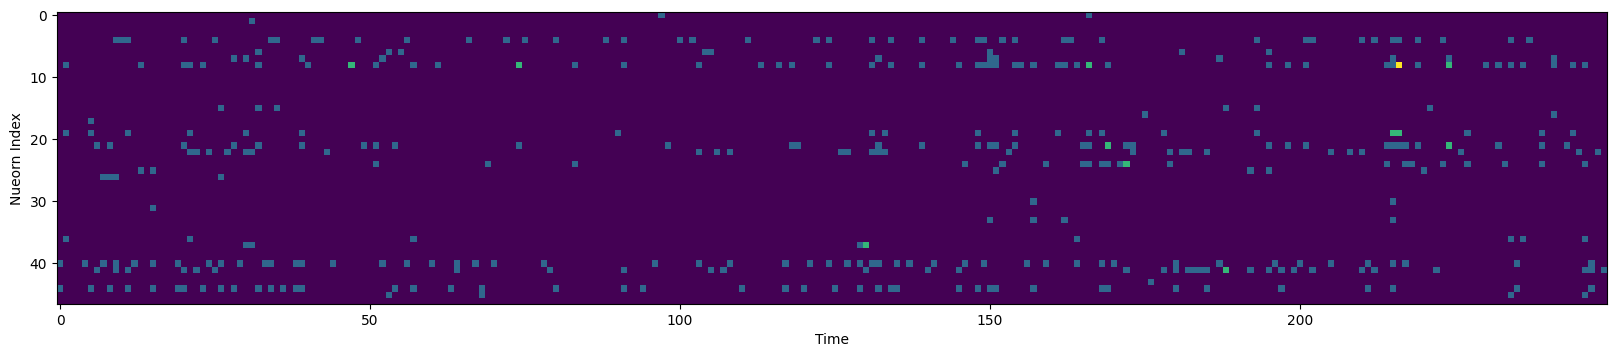

In [25]:
# Activity of CA1 neurons in trial number 22
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(dat['spks'][dat['brain_area']=='CA1',22,:], interpolation = 'nearest')
ax.set_xlabel('Time')
ax.set_ylabel('Nueorn Index')

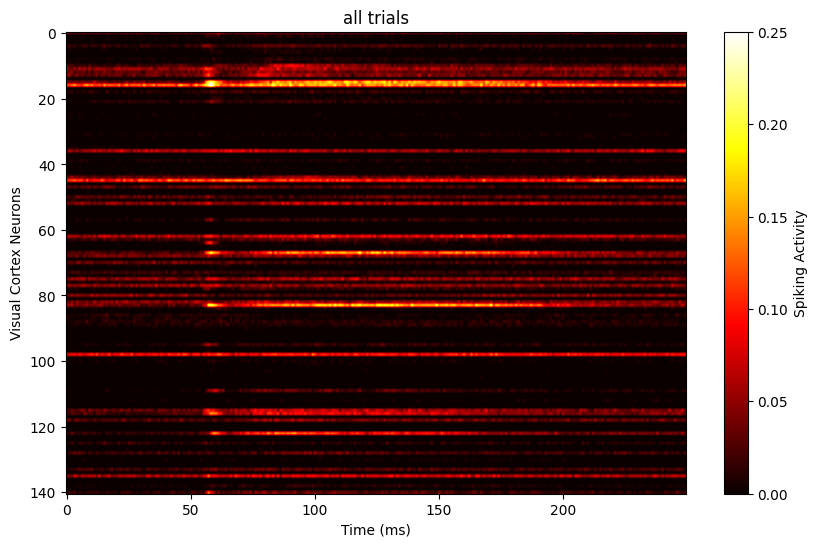

In [26]:
plt.figure(figsize = (10, 6))
plt.imshow(data['vis ctx'].mean(axis=(1)), cmap='hot',vmax = 0.25, vmin=0, aspect='auto')
plt.xlabel('Time (ms)')
plt.ylabel('Visual Cortex Neurons')
plt.colorbar(orientation='vertical', label='Spiking Activity')
plt.title('all trials')
plt.show()

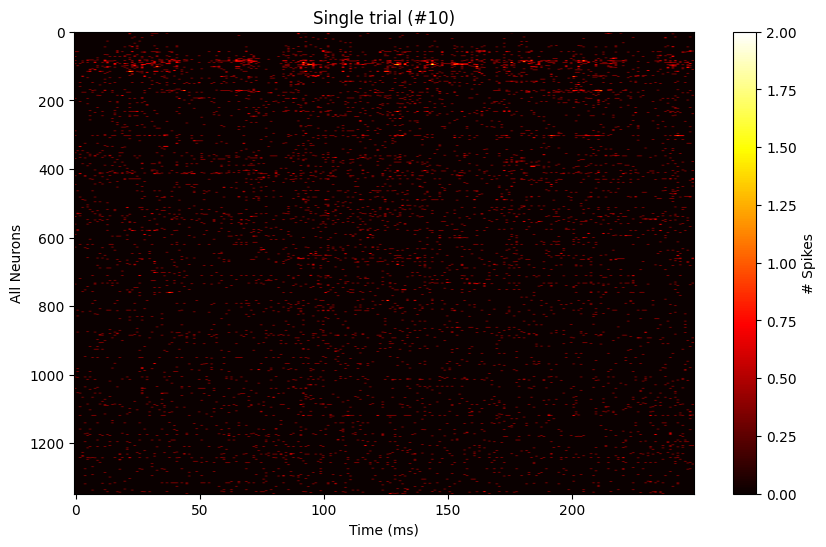

In [27]:
# heatmap of all neruons activity in a single random trial
plt.figure(figsize = (10, 6))
trial = 10
plt.imshow(dat['spks'][:, trial, :], cmap='hot', vmax = 2, vmin=0, aspect='auto')
plt.xlabel('Time (ms)')
plt.ylabel('All Neurons')
plt.colorbar(orientation='vertical', label='# Spikes')
plt.title('Single trial (#10)')
plt.show()

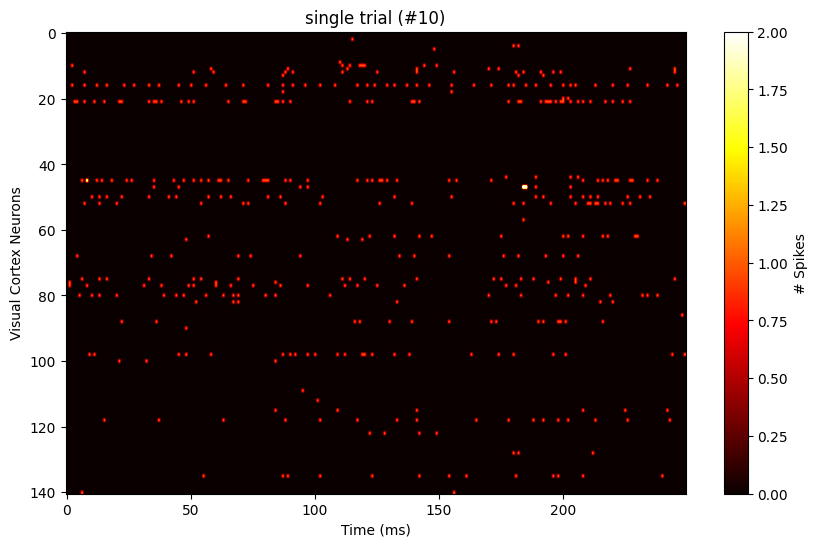

In [28]:
# heatmap of visual cortex neruons activity in a single random trial
plt.figure(figsize = (10, 6))
trial = 10
plt.imshow(data['vis ctx'][:, trial, :], cmap='hot', vmax = 2, vmin=0, aspect='auto')
plt.xlabel('Time (ms)')
plt.ylabel('Visual Cortex Neurons')
plt.colorbar(orientation='vertical', label='# Spikes')
plt.title('single trial (#10)')
plt.show()

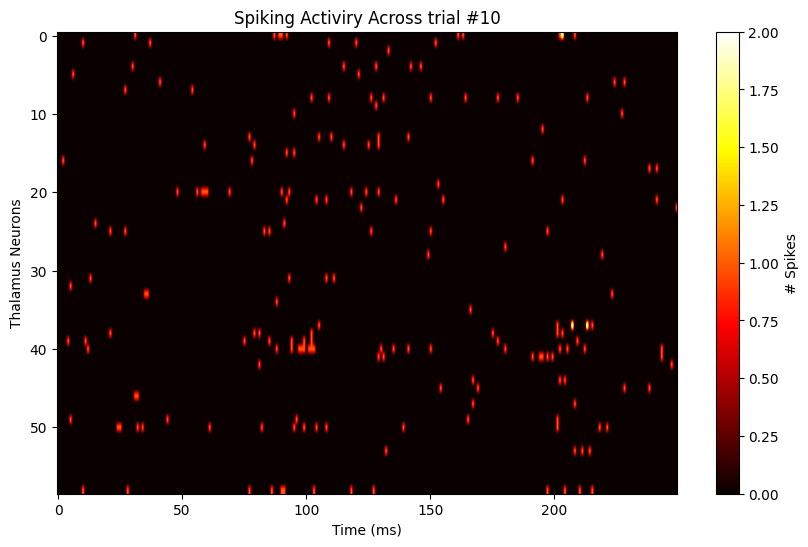

In [50]:
# heatmap of Thalamus neruons activity in a single random trial
plt.figure(figsize = (10, 6))
trial = 10
plt.imshow(data['thal'][:, trial, :], cmap='hot', vmax = 2, vmin=0, aspect='auto')
plt.xlabel('Time (ms)')
plt.ylabel('Thalamus Neurons')
plt.colorbar(orientation='vertical', label='# Spikes')
plt.title('Spiking Activiry Across trial #10')
plt.show()

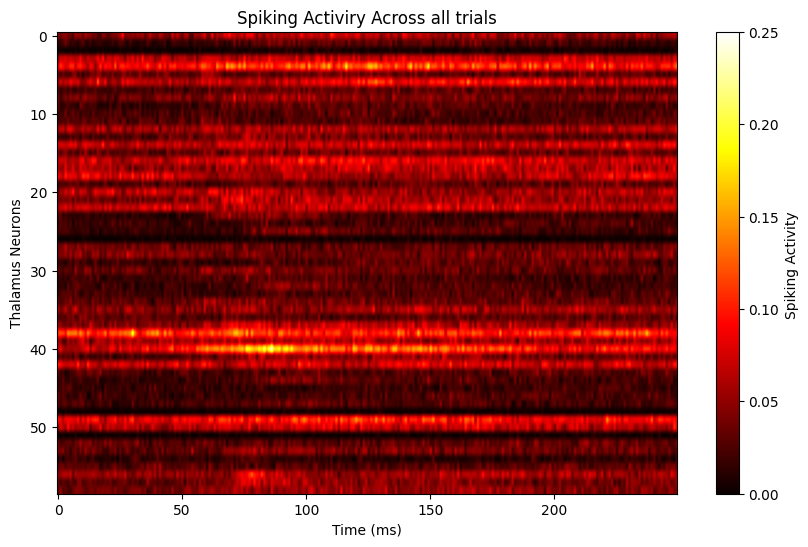

In [51]:
# heatmap of Thalamus neruons activity in all trials
plt.figure(figsize = (10, 6))
plt.imshow(data['thal'].mean(axis=1), cmap='hot', vmax = .25, vmin=0, aspect='auto')
plt.xlabel('Time (ms)')
plt.ylabel('Thalamus Neurons')
plt.colorbar(orientation='vertical', label='Spiking Activity ')
plt.title('Spiking Activiry Across all trials')
plt.show()

Text(0.5, 1.0, 'Raster Plot for Visual Cortex neurons Trial 10')

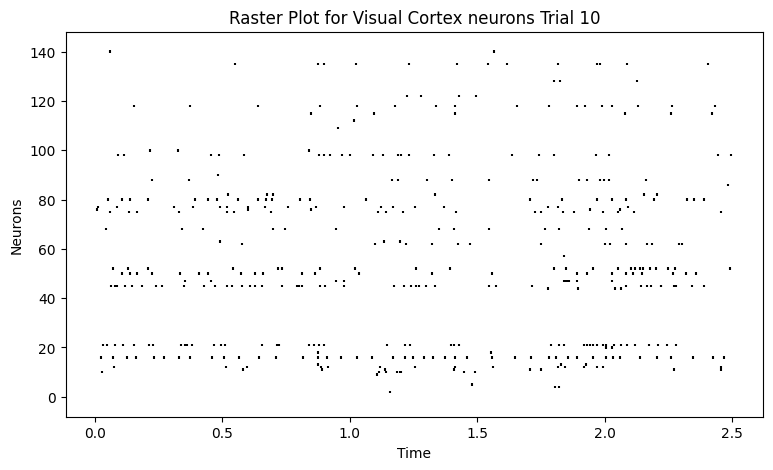

In [31]:
spikes= dat_sp['ss']
plt.figure(figsize=(9,5))
plt.eventplot(spikes[session_df['Area']=='Visual Ctx'][:,trial],color='k')
plt.ylabel('Neurons');
plt.xlabel('Time');
plt.title('Raster Plot for Visual Cortex neurons Trial 10')


Text(0.5, 1.0, 'Raster Plot for a Single Neuron In Visual Cortex Across All Trials ')

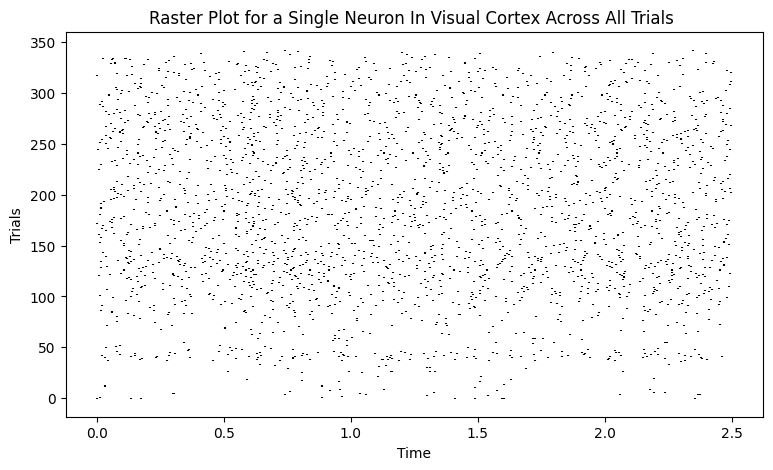

In [58]:
plt.figure(figsize=(9,5))
plt.eventplot(spikes[session_df['Area']=='Visual Ctx'][0,:],color='k')
plt.ylabel('Trials');
plt.xlabel('Time');
plt.title('Raster Plot for a Single Neuron In Visual Cortex Across All Trials ')

Aligning Behavioral Information To Raster Plots

In [32]:
#Helper function to get behabioral data from a selected session
def Behavioral_Data(neuron_index, s_id):
  b_data = {}
  b_data['contrastRight'] = alldat[s_id]['contrast_right']
  b_data['contrastLeft'] = alldat[s_id]['contrast_left']
  b_data['response'] = alldat[s_id]['response']
  b_data['response_time'] = alldat[s_id]['response_time']
  b_data['stim_onset'] = alldat[s_id]['stim_onset']
  b_data['gocue'] = alldat[s_id]['gocue']
  b_data['active_trials'] = alldat[s_id]['active_trials']
  b_data['feedback_time'] = alldat[s_id]['feedback_time']
  b_data['feedback_type'] = alldat[s_id]['feedback_type']
  b_data['prev_reward'] = alldat[s_id]['prev_reward']
  return b_data

In [61]:
visual_neurons = Neuron_Index("VISp", alldat)
behavioralData_V1SP = Behavioral_Data(visual_neurons, 38)

In [62]:
print(f"Right contrast: {behavioralData_V1SP['contrastRight'][10]}")
print(f"Left contrast: {behavioralData_V1SP['contrastLeft'][10]}")
print(f"Response: {behavioralData_V1SP['response'][10]}")
print(f"Stimulus onset: {behavioralData_V1SP['stim_onset']}s")
print(f"Active trial: {behavioralData_V1SP['active_trials'][10]}")
print(f"Go cue: {behavioralData_V1SP['gocue'][10]}")

Right contrast: 0.0
Left contrast: 0.0
Response: 1.0
Stimulus onset: 0.5s
Active trial: True
Go cue: [0.41821133]


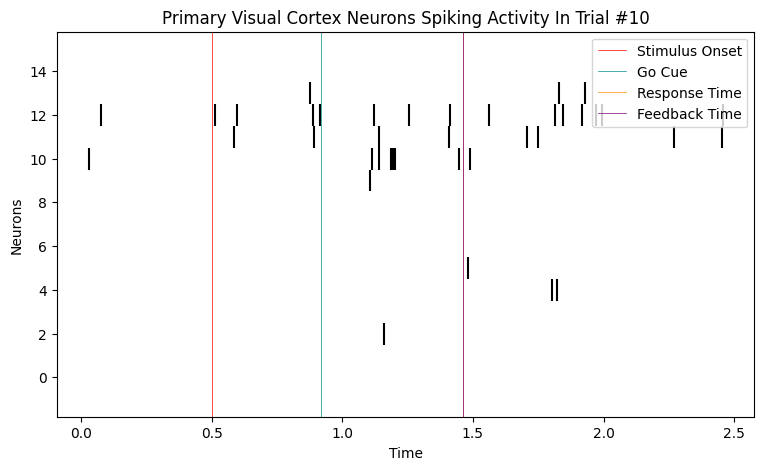

In [47]:
spikes= dat_sp['ss']
plt.figure(figsize=(9,5))
plt.eventplot(spikes[session_df['Region'] == 'VISp'][:,10],color='k')
plt.axvline(x=behavioralData_V1SP['stim_onset'], linewidth=0.5, color='r', label='Stimulus Onset')
plt.axvline(x=behavioralData_V1SP['stim_onset'] + behavioralData_V1SP['gocue'][10], linewidth=0.5, color='darkcyan', label='Go Cue')
plt.axvline(x=behavioralData_V1SP['stim_onset'] + behavioralData_V1SP['response_time'][10], linewidth=0.5, color='darkorange', label='Response Time')
plt.axvline(x=behavioralData_V1SP['stim_onset'] + behavioralData_V1SP['feedback_time'][10], linewidth=0.5, color='purple', label='Feedback Time')
plt.ylabel('Neurons');
plt.xlabel('Time');
plt.title('Primary Visual Cortex Neurons Spiking Activity In Trial #10')
plt.legend()

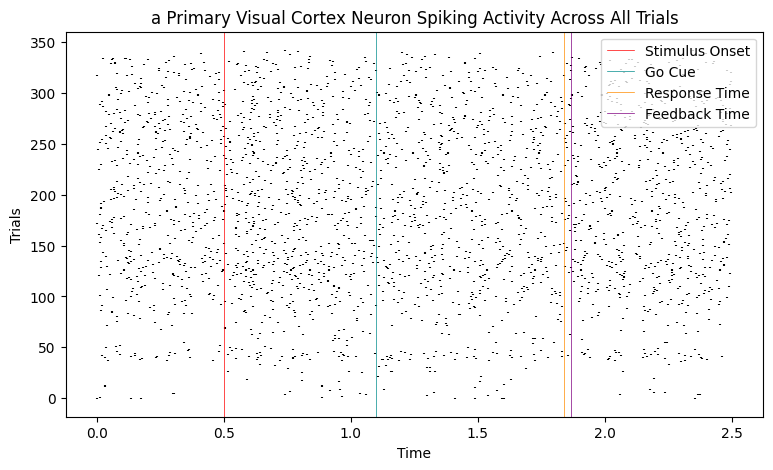

In [64]:
plt.figure(figsize=(9,5))
plt.eventplot(spikes[session_df['Region'] == 'VISp'][0,:],color='k')
plt.axvline(x=behavioralData_V1SP['stim_onset'], linewidth=0.5, color='r', label='Stimulus Onset')
plt.axvline(x=behavioralData_V1SP['stim_onset'] + np.mean(behavioralData_V1SP['gocue']), linewidth=0.5, color='darkcyan', label='Go Cue')
plt.axvline(x=behavioralData_V1SP['stim_onset'] + np.mean(behavioralData_V1SP['response_time']), linewidth=0.5, color='darkorange', label='Response Time')
plt.axvline(x=behavioralData_V1SP['stim_onset'] + np.mean(behavioralData_V1SP['feedback_time']), linewidth=0.5, color='purple', label='Feedback Time')
plt.ylabel('Trials');
plt.xlabel('Time');
plt.title('a Primary Visual Cortex Neuron Spiking Activity Across All Trials')
plt.legend()